<a href="https://colab.research.google.com/github/evelynunez18/IA_002_A2024_IB/blob/main/PIA_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project: Training a Machine Learning model on medical images: Augmented Alzheimer MRI Dataset**

Team:

*   Eugenia Lopez Silva 1994028
*   Evelyn Sofia Nuñez Cura 1997373
*   Gonzalo Hernandez Ponzio 1905790

Redes Neuronales FIME-2025

**Step 1: Import Libraries**


In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.datasets import mnist
from random import randint
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

**Step 2: Import data**


In [ ]:
!pip install kaggle
from google.colab import files

# Subir el archivo kaggle.json que descargaste de Kaggle
files.upload()

# Crear el directorio kaggle y mover el archivo kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descargar el dataset
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

# Descomprimir el dataset
!unzip brain-mri-images-for-brain-tumor-detection.zip

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 93% 14.0M/15.1M [00:00<00:00, 72.1MB/s]
100% 15.1M/15.1M [00:00<00:00, 75.4MB/s]
Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: b

In [ ]:
def load_data(data_dir):
    data = []
    labels = []
    for category in ["no", "yes"]:
        path = os.path.join(data_dir, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))
            data.append(image)
            labels.append(category)
    return np.array(data), np.array(labels)

data_dir = "/content/brain_tumor_dataset"
data, labels = load_data(data_dir)

data = data / 255.0  # Normalizar las imágenes
data = np.expand_dims(data, axis=-1)  # Expandir dimensiones para el canal único

**Step 4: Model selection, setup and training**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Codificar las etiquetas
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 0.6392 - accuracy: 0.6584 - val_loss: 0.5402 - val_accuracy: 0.7843
Epoch 2/20
7/7 [==============================] - 7s 1s/step - loss: 0.5332 - accuracy: 0.7426 - val_loss: 0.4648 - val_accuracy: 0.8235
Epoch 3/20
7/7 [==============================] - 4s 540ms/step - loss: 0.4759 - accuracy: 0.7871 - val_loss: 0.4723 - val_accuracy: 0.8039
Epoch 4/20
7/7 [==============================] - 4s 541ms/step - loss: 0.4280 - accuracy: 0.7970 - val_loss: 0.4663 - val_accuracy: 0.8431
Epoch 5/20
7/7 [==============================] - 4s 656ms/step - loss: 0.3946 - accuracy: 0.8267 - val_loss: 0.4514 - val_accuracy: 0.8431
Epoch 6/20
7/7 [==============================] - 4s 541ms/step - loss: 0.3749 - accuracy: 0.8366 - val_loss: 0.4284 - val_accuracy: 0.8235
Epoch 7/20
7/7 [==============================] - 4s 540ms/step - loss: 0.3320 - accuracy: 0.8366 - val_loss: 0.5152 - val_accuracy: 0.8627
Epoch 8/20
7/7 [==========

**Step 5: Test the model**

1/1 [==============================] - 0s 141ms/step


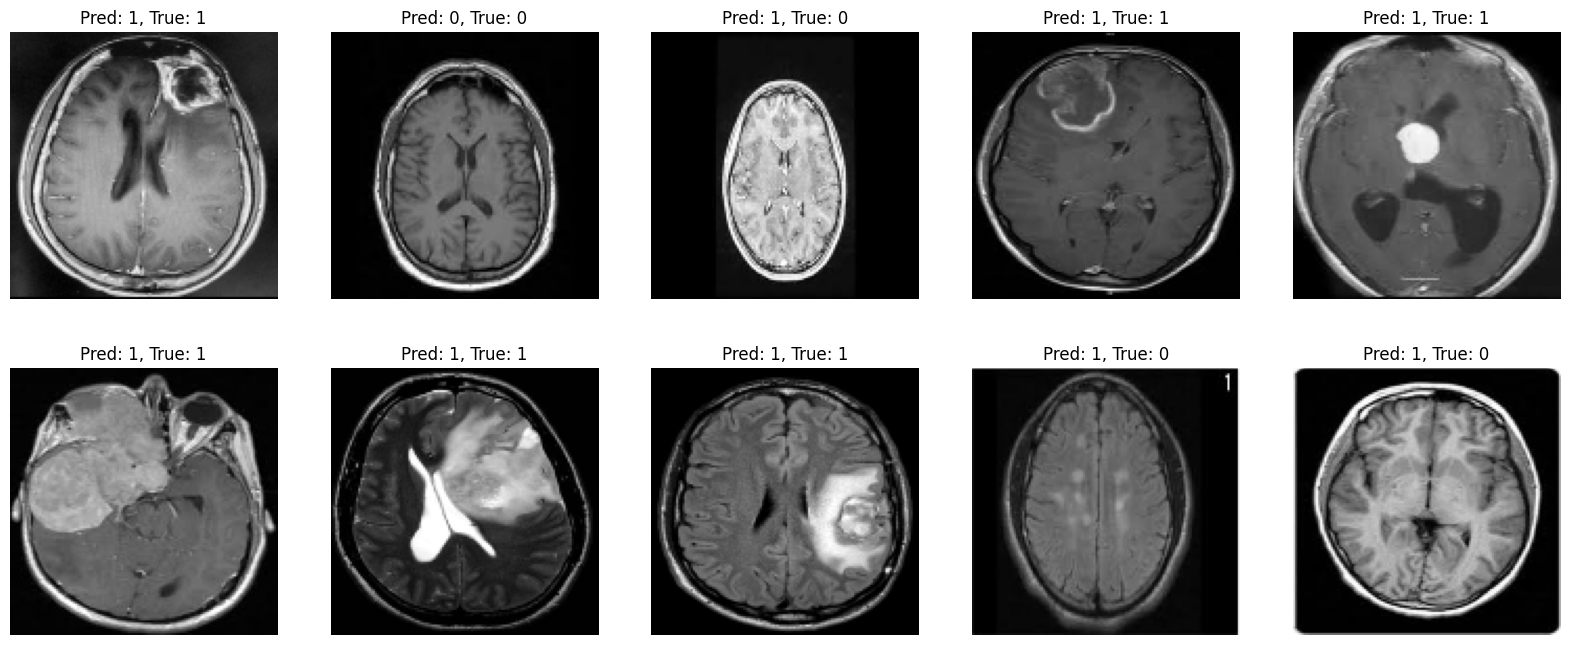

In [ ]:
predictions = model.predict(X_test[:10])
predicted_labels = (predictions > 0.5).astype(int)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(128, 128), cmap='gray')
    ax.set_title(f"Pred: {predicted_labels[i][0]}, True: {y_test[i][0]}")
    ax.axis('off')
plt.show()

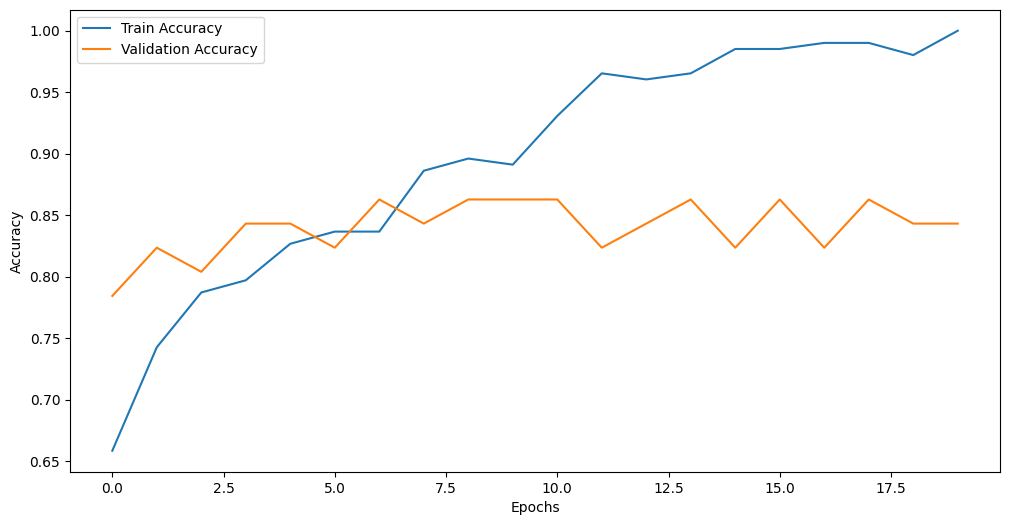

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()